In [1]:
import os
import pandas as pd
from matplotlib import pyplot as plt

%matplotlib inline

In [6]:
# Google colab: 데이터 경로 설정
path = '../data/movielens/'

In [7]:
os.listdir(path)

['links.csv', 'movies.csv', 'ratings.csv', 'README.txt', 'tags.csv']

In [8]:
ratings_df = pd.read_csv(os.path.join(path + 'ratings.csv'), encoding='utf-8')
tags_df = pd.read_csv(os.path.join(path + 'tags.csv'), encoding='utf-8')
movies_df = pd.read_csv(os.path.join(path + 'movies.csv'), index_col='movieId', encoding='utf-8')

* timestamp는 영화에 대한 평점을 기록한 시점. 영화가 처음 출시한 시점이 아니다

In [9]:
print(ratings_df.shape)
print(ratings_df.head())

(100836, 4)
   userId  movieId  rating  timestamp
0       1        1     4.0  964982703
1       1        3     4.0  964981247
2       1        6     4.0  964982224
3       1       47     5.0  964983815
4       1       50     5.0  964982931


In [10]:
# tag는 감상평
print(tags_df.shape)
print(tags_df.head())

(3683, 4)
   userId  movieId              tag   timestamp
0       2    60756            funny  1445714994
1       2    60756  Highly quotable  1445714996
2       2    60756     will ferrell  1445714992
3       2    89774     Boxing story  1445715207
4       2    89774              MMA  1445715200


In [11]:
print(movies_df.shape)
print(movies_df.head())

(9742, 2)
                                      title  \
movieId                                       
1                          Toy Story (1995)   
2                            Jumanji (1995)   
3                   Grumpier Old Men (1995)   
4                  Waiting to Exhale (1995)   
5        Father of the Bride Part II (1995)   

                                              genres  
movieId                                               
1        Adventure|Animation|Children|Comedy|Fantasy  
2                         Adventure|Children|Fantasy  
3                                     Comedy|Romance  
4                               Comedy|Drama|Romance  
5                                             Comedy  


### 평점 데이터의 기초 통계량

In [24]:
n_unique_users = len(ratings_df['userId'].unique())
print(n_unique_users)

610


In [25]:
n_unique_movies = len(ratings_df['movieId'].unique())
print(n_unique_movies)

9724


In [26]:
print('평점의 평균: ', ratings_df['rating'].mean())
print('평점의 표준편차: ', ratings_df['rating'].std())

평점의 평균:  3.501556983616962
평점의 표준편차:  1.042529239060635


In [27]:
ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


In [29]:
ratings_df.describe()

,userId,movieId,rating,timestamp
count,100836.000000,100836.000000,100836.000000,1.008360e+05
mean,326.127564,19435.295718,3.501557,1.205946e+09
std,182.618491,35530.987199,1.042529,2.162610e+08
min,1.000000,1.000000,0.500000,8.281246e+08
25%,177.000000,1199.000000,3.000000,1.019124e+09
50%,325.000000,2991.000000,3.500000,1.186087e+09
75%,477.000000,8122.000000,4.000000,1.435994e+09
max,610.000000,193609.000000,5.000000,1.537799e+09


In [30]:
# nan 값이 있는지 확인한다
ratings_df.isnull().sum()

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

array([[<AxesSubplot:title={'center':'userId'}>,
        <AxesSubplot:title={'center':'movieId'}>],
       [<AxesSubplot:title={'center':'rating'}>, <AxesSubplot:>]],
      dtype=object)

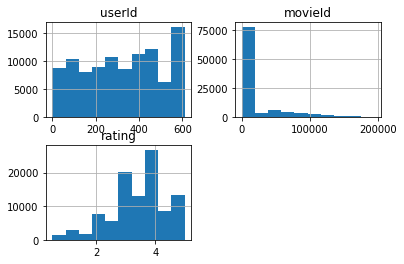

In [31]:
ratings_df[['userId','movieId','rating']].hist()

### Pandas의 GroupBy 사용하기

In [37]:
ratings_df.groupby(['userId', 'rating']).size()

userId  rating
1       1.0         1
        2.0         5
        3.0        26
        4.0        76
        5.0       124
                 ... 
610     3.0       230
        3.5       315
        4.0       286
        4.5       148
        5.0       180
Length: 3976, dtype: int64

* userId와 rating을 기준으로 기초 통계량

In [38]:
ratings_df.groupby(['userId']).mean()

,movieId,rating,timestamp
userId,,,
1,1854.603448,4.366379,9.649856e+08
2,70350.275862,3.948276,1.445715e+09
3,7058.384615,2.435897,1.306464e+09
4,1982.129630,3.555556,9.658643e+08
5,343.840909,3.636364,8.474351e+08
...,...,...,...
606,9692.197309,3.657399,1.179512e+09
607,1860.636364,3.786096,9.647841e+08
608,4502.605295,3.134176,1.122668e+09


In [39]:
userid_rating_df = pd.DataFrame({'count': ratings_df.groupby(['userId', 'rating']).size()})
userid_rating_df = userid_rating_df.reset_index()
userid_rating_df.head(10)

,userId,rating,count
0,1,1.0,1
1,1,2.0,5
2,1,3.0,26
3,1,4.0,76
4,1,5.0,124
5,2,2.0,1
6,2,2.5,1
7,2,3.0,4
8,2,3.5,4
9,2,4.0,9


In [44]:
ratings_df.groupby('userId')['movieId'].count()

userId
1       232
2        29
3        39
4       216
5        44
       ... 
606    1115
607     187
608     831
609      37
610    1302
Name: movieId, Length: 610, dtype: int64

In [40]:
user_info = ratings_df.groupby('userId')['movieId'].count()

In [43]:
user_info.describe()

count     610.000000
mean      165.304918
std       269.480584
min        20.000000
25%        35.000000
50%        70.500000
75%       168.000000
max      2698.000000
Name: movieId, dtype: float64

In [45]:
import seaborn as sns

C:\Users\user\anaconda3\envs\kse_env\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

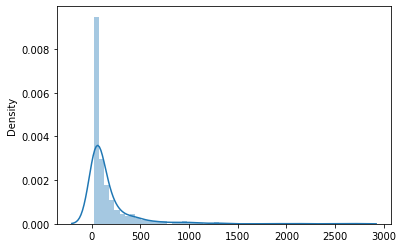

In [46]:
# user가 몇개의 영화에 대해서 rating을 했는지를 볼 수 있는 분포(그래프)
sns.distplot(user_info.values)

### user가 평균적으로 준 평점과 평점을 준 영화의 수

In [47]:
stats_df = pd.DataFrame({
    'movie_count': ratings_df.groupby('userId')['movieId'].count(),
    'rating_avg': ratings_df.groupby('userId')['rating'].mean(), 
    'rating_std': ratings_df.groupby('userId')['rating'].std()})

print(stats_df.shape)
print(stats_df.head())

(610, 3)
        movie_count  rating_avg  rating_std
userId                                     
1               232    4.366379    0.800048
2                29    3.948276    0.805615
3                39    2.435897    2.090642
4               216    3.555556    1.314204
5                44    3.636364    0.990441


### rating이 많은 영화(다시 말해, 사람들이 관심 많은 영화)

* 많이 본 영화일수록 평점이 좋다? 

In [48]:
movieid_user_df = pd.DataFrame({
    'num_users_watch': ratings_df.groupby('movieId')['userId'].count(),
    'avg_ratings': ratings_df.groupby('movieId')['rating'].mean(),
    'std_ratings': ratings_df.groupby('movieId')['rating'].std()
})
movieid_user_df = movieid_user_df.reset_index()
print(movieid_user_df.shape)
print(movieid_user_df.head(10))

(9724, 4)
   movieId  num_users_watch  avg_ratings  std_ratings
0        1              215     3.920930     0.834859
1        2              110     3.431818     0.881713
2        3               52     3.259615     1.054823
3        4                7     2.357143     0.852168
4        5               49     3.071429     0.907148
5        6              102     3.946078     0.817224
6        7               54     3.185185     0.977561
7        8                8     2.875000     1.125992
8        9               16     3.125000     0.974679
9       10              132     3.496212     0.859381


In [49]:
movieid_user_df.sort_values(by='num_users_watch', ascending=False)

,movieId,num_users_watch,avg_ratings,std_ratings
314,356,329,4.164134,0.831244
277,318,317,4.429022,0.713019
257,296,307,4.197068,0.951997
510,593,279,4.161290,0.853983
1938,2571,278,4.192446,0.975243
...,...,...,...,...
3053,4093,1,1.500000,NaN
3049,4089,1,2.000000,NaN
6687,58351,1,4.000000,NaN
3045,4083,1,4.000000,NaN


<AxesSubplot:>

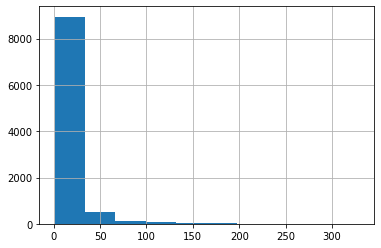

In [53]:
# long tail economy
movieid_user_df['num_users_watch'].hist()

In [56]:
# 1번 또는 1명만 평점을 준 영화
movieid_user_df['movieId'][movieid_user_df.num_users_watch == 1].count()

3446

In [57]:
# 3번 미만의 영화
movieid_user_df['movieId'][movieid_user_df.num_users_watch < 3].count()

4744

### 평점이 높은 영화(장르), 평점을 많이 받은 영화(장르)

In [58]:
# 영화 정보를 활용
movies_df.head()

,title,genres
movieId,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,Jumanji (1995),Adventure|Children|Fantasy
3,Grumpier Old Men (1995),Comedy|Romance
4,Waiting to Exhale (1995),Comedy|Drama|Romance
5,Father of the Bride Part II (1995),Comedy


In [59]:
# 평점을 많이 받은 영화 
ratings_count_df = ratings_df.groupby('movieId')['userId'].count()
ratings_count_df.head()

movieId
1    215
2    110
3     52
4      7
5     49
Name: userId, dtype: int64

In [71]:
df = pd.DataFrame({
    'ratings_count': ratings_df.groupby('movieId')['userId'].count(),
})

In [72]:
df

,ratings_count
movieId,
1,215
2,110
3,52
4,7
5,49
...,...
193581,1
193583,1
193585,1


In [73]:
movies_df['title'].loc[movies_df['title'].index]

movieId
1                                  Toy Story (1995)
2                                    Jumanji (1995)
3                           Grumpier Old Men (1995)
4                          Waiting to Exhale (1995)
5                Father of the Bride Part II (1995)
                            ...                    
193581    Black Butler: Book of the Atlantic (2017)
193583                 No Game No Life: Zero (2017)
193585                                 Flint (2017)
193587          Bungo Stray Dogs: Dead Apple (2018)
193609          Andrew Dice Clay: Dice Rules (1991)
Name: title, Length: 9742, dtype: object

In [74]:
# df['movie_name'] = df.apply(lambda x: movies_df['title'].loc[x.index])

In [75]:
df['movie_name'] = movies_df['title']

In [76]:
df.head(10)

,ratings_count,movie_name
movieId,,
1,215,Toy Story (1995)
2,110,Jumanji (1995)
3,52,Grumpier Old Men (1995)
4,7,Waiting to Exhale (1995)
5,49,Father of the Bride Part II (1995)
6,102,Heat (1995)
7,54,Sabrina (1995)
8,8,Tom and Huck (1995)
9,16,Sudden Death (1995)


In [77]:
df.sort_values(by='ratings_count', ascending=False)

,ratings_count,movie_name
movieId,,
356,329,Forrest Gump (1994)
318,317,"Shawshank Redemption, The (1994)"
296,307,Pulp Fiction (1994)
593,279,"Silence of the Lambs, The (1991)"
2571,278,"Matrix, The (1999)"
...,...,...
4093,1,Cop (1988)
4089,1,Born in East L.A. (1987)
58351,1,City of Men (Cidade dos Homens) (2007)


### 특정 영화의 평점 분포

* movieId :  356, Forrest Gump(1994)
* movieId : 2571, Matrix, The (1999)

In [79]:
ratings_df[ratings_df.movieId == 356]

,userId,movieId,rating,timestamp
20,1,356,4.0,964980962
725,6,356,5.0,845553200
880,7,356,5.0,1106635915
1053,8,356,3.0,839463527
1120,10,356,3.5,1455301685
...,...,...,...,...
97154,605,356,3.0,1277097509
97428,606,356,4.0,1171231370
98735,608,356,3.0,1117162603
99514,609,356,4.0,847220869


<AxesSubplot:>

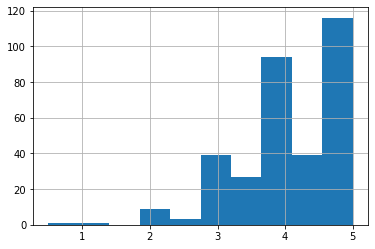

In [78]:
ratings_df[ratings_df.movieId == 356]['rating'].hist()

<AxesSubplot:>

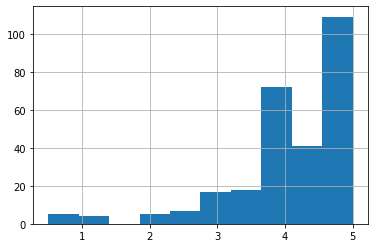

In [80]:
ratings_df[ratings_df.movieId == 2571]['rating'].hist()

### 특정 유저가 주는 평점과 실제 영화에 대한 평점 분포가 비슷할까? 

* 나는 일반적인 영화 관람객일까? 특이한 취향을 갖고있는 사람일까? 

In [81]:
ratings_df[(ratings_df.movieId == 356) & (ratings_df.rating < 2)]

,userId,movieId,rating,timestamp
12274,76,356,1.0,1439165536
13553,89,356,0.5,1520408275


In [82]:
ratings_df[(ratings_df.movieId == 2571) & (ratings_df.rating < 2)]

,userId,movieId,rating,timestamp
442,4,2571,1.0,945173385
1130,10,2571,0.5,1455356378
8706,59,2571,1.0,953609098
12239,75,2571,1.0,1158967564
17337,111,2571,0.5,1516140656
22474,153,2571,0.5,1525548255
65107,416,2571,1.0,1187496634
71534,461,2571,0.5,1505935248
71706,462,2571,0.5,1154037742


<AxesSubplot:>

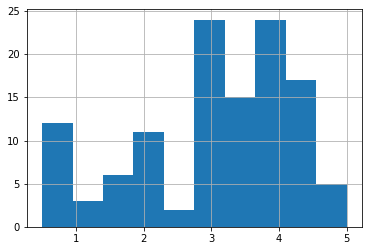

In [83]:
ratings_df[ratings_df.userId == 76]['rating'].hist()